## Fitting Ne lines in a loop
- This notebook shows how to fit all lines in a folder defined by path
- You tweak the fit for a single line, and then use this to fit all lines. You can then refit lines with high residuals/offsets differing from the rest

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf

## Get Ne line positions for your specific laser wavelength

In [44]:
df_Ne=pf.calculate_Ne_line_positions(wavelength=532.067)
df_Ne.head()

,Raman_shift (cm-1),Intensity,Ne emission line in air
0,816.909946,1500.0,556.2442
1,817.957047,5000.0,556.2766
2,818.884470,750.0,556.3053
3,860.748054,350.0,557.6039
4,892.423429,50.0,558.5905


## Calculate distance between the two lines you are selecting

In [45]:
ideal_split=pf.calculate_Ne_splitting(wavelength=532.05, line1_shift=1117, line2_shift=1447)

In [46]:
ideal_split

,Ne_Split,Line_1,Line_2,Entered Pos Line 1,Entered Pos Line 2
0,330.477611,1116.946307,1447.423918,1117,1447


In [47]:
line1_shift=1117
line2_shift=1447
def find_closest(df, line1_shift):
    dist = (df['Raman_shift (cm-1)'] - line1_shift).abs() 
    return df.loc[dist.idxmin()]

d=find_closest(df_Ne, 1117)


In [48]:
d.loc['Raman_shift (cm-1)']

1116.3457835072622

## Choose path and extract files here

In [62]:
path=r'/Users/kyledayton/Documents/Python Codes/DiadFit-main 0.0.11/docs/Examples/Ne_Line_Fitting/LM0 Refit Ne'
filetype='headless_txt'
# Put the common string you can in all your Ne lines here
ID_str='NE'
file_fmt='txt'
exclude_str='png'
# If you added a prefix in Witec, e.g. 01, removes when svaing the Ne line name 
prefix=False
Ne_files=pf.get_Ne_files(path=path, ID_str=ID_str, exclude_str=exclude_str, sort=True)

## Fit 1 spectra, and check you are happy with the parameters
- First plot i, and check peak postion. 

Found peaks at wavenumber=
[1053.952476 1058.476903 1082.168247 1096.78231  1105.19545  1118.069988
 1128.68213  1135.930916 1140.943528 1143.726271 1147.06364  1155.953037
 1160.946775 1170.366544 1173.133869 1179.216877 1192.464545 1195.77125
 1199.075872 1204.57895  1215.018881 1220.505213 1243.484908 1277.764507
 1298.871422 1301.571161 1305.348403 1307.505574 1310.739623 1317.201578
 1318.815787 1341.89664  1349.923444 1368.070434 1372.330828 1377.119459
 1389.866838 1393.578719 1399.40611  1420.539387 1428.967602 1436.330549
 1447.878781 1465.672988 1488.085395 1537.238418 1540.326114 1546.495571
 1549.577333 1552.143958 1567.003346 1587.932904]
selected Peak 1 Pos
1118.069988
selected Peak 2 Pos
1447.878781


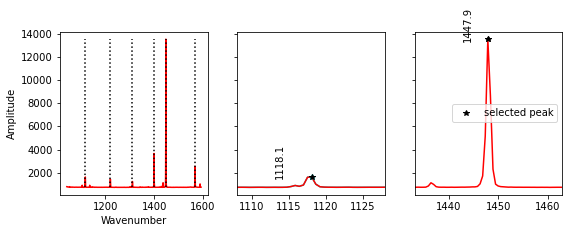

In [63]:
filename=Ne_files[0]  # Or you could put a string here, like 'NE1.txt' 
# You might need to adjust if your spectra is way off
peak1_cent=1118
peak2_cent=1448


Ne, df_sort_Ne_trim, nearest_1117, nearest_1447=pf.plot_Ne_lines(path=path, filename=filename, filetype=filetype, 
n_peaks=6, peak1_cent=peak1_cent, peak2_cent=peak2_cent,
height=10, threshold=0.6, distance=1, prominence=10, width=1, exclude_range_1=None,
exclude_range_2=None)

## Now tweak the fit for this 1 example
- Most important things, the number of peaks you want for 1117, and the offset for this peak (LH_offset_min)
- By default, the function applies the fit to all the points inside the outermost background positions. This can be trimmed using x_span_pk1_override, and x_span_pk2_override, 

first iteration, peak Center=1117.8021
first iteration, peak Amplitude=1480.6091
Trying to place second peak between 1112.8and1115.8
Error bars not determined by function


,File_Name,1447_peak_cent,error_1447,1117_peak_cent,error_1117,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_1447,residual_1117
0,14 NE 5.txt,1447.991199,0.00559,1117.803325,NaN,330.187874,1.000877,NaN,NaN,87.038494,15.412085


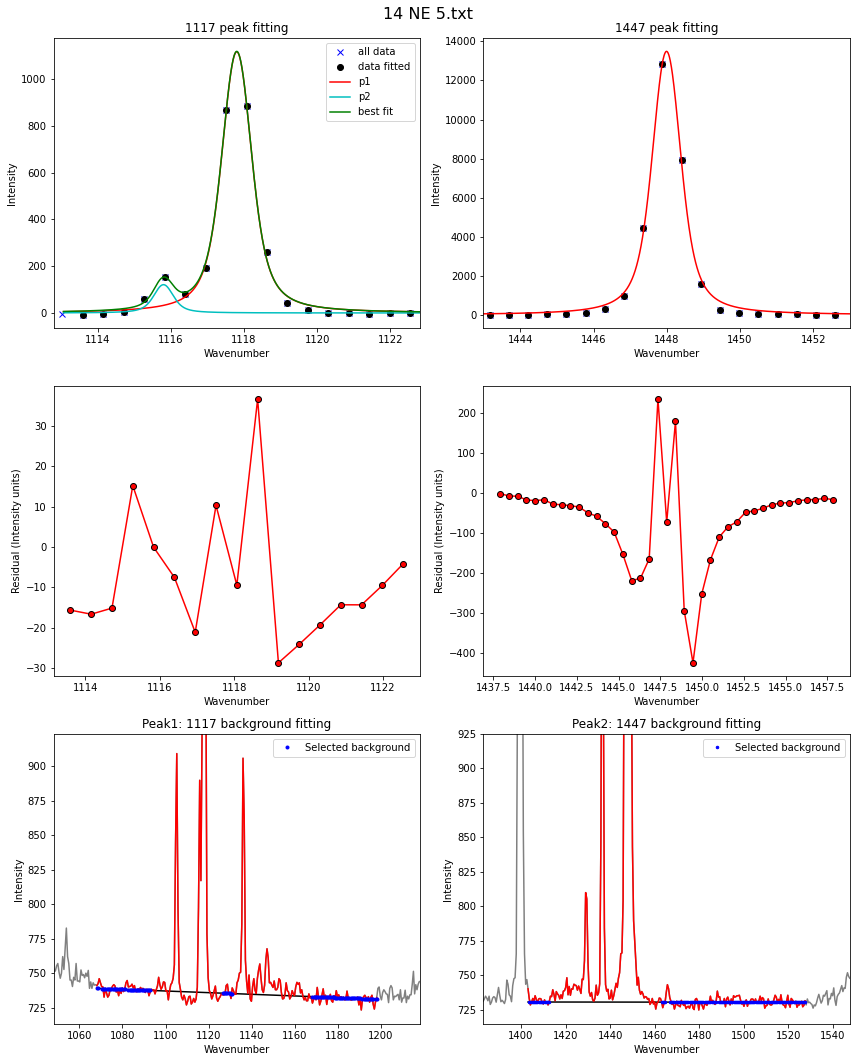

In [64]:
#If you have weak Ne lines and no secondary peak, set to 1
peaks_1=2
# Determines how far from the peak center the 2nd peak is. 
LH_offset_mini=[2, 5]
# If fit really bad, try tweaking the amplitude here
amplitude=100
#x_range - Determins how much outside your selected background position the baseline plot shows
x_range_baseline=20
# Y range- Determins how much y axis you get above the baseline on the plot
y_range_baseline=200

# Can either set this as none, in which case it fits between the background positions,
#or decide exactly how many wavenumbers either side of the peak position above you want the voigt routine to fit
# E.g. here, fitting 10 either side of the peak for Peak 1
x_span_pk1_override=[-5, 5]
# And -5 to the left, 7 to the right of Peak2
x_span_pk2_override=[-10, 10]

# Sets x lim for peak fit top plot, if None, uses range of x of fitting data, can override
x_range_peak=5



# To see other parameters you can tweak, do help(pf.fit_Ne_lines) if this isn't working fo your spectra. 
df_test, Ne_1117_reg_x_plot, Ne_1117_reg_y_plot=pf.fit_Ne_lines(
Ne=Ne, filename=filename, path=path, prefix=prefix,
LH_offset_mini=LH_offset_mini, peaks_1=peaks_1,
Ne_center_1=nearest_1117, Ne_center_2=nearest_1447,
lower_bck_pk1=[-50, -25], upper_bck1_pk1=[8, 13], upper_bck2_pk1=[50, 80],
lower_bck_pk2=[-45, -35], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80],
amplitude=amplitude, x_range_baseline=x_range_baseline, y_range_baseline=y_range_baseline, 
x_span_pk1_override=x_span_pk1_override,
x_span_pk2_override=x_span_pk2_override, x_range_peak=x_range_peak, DeltaNe_ideal=ideal_split['Ne_Split'])
df_test


## Now you can loop over all files using these parameters
- Most important thing you can change is plot_figure=False, much quicker, but wont save or show figures, plot_figure=True will)
- If you need, you can add other parameters in the loop here. 

working on 14 NE 5.txt
first iteration, peak Center=1117.8021
first iteration, peak Amplitude=1480.6091
Trying to place second peak between 1112.8and1115.8
Error bars not determined by function


/var/folders/5m/qgr9jhb91jv3z3bz7_tkt1s00000gn/T/ipykernel_32275/2178908951.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 29 NE 10.txt
first iteration, peak Center=1117.8345
first iteration, peak Amplitude=1420.3635
Trying to place second peak between 1112.83and1115.83
Error bars not determined by function


/var/folders/5m/qgr9jhb91jv3z3bz7_tkt1s00000gn/T/ipykernel_32275/2178908951.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 33 NE 12.txt
first iteration, peak Center=1117.8315
first iteration, peak Amplitude=1454.647
Trying to place second peak between 1112.83and1115.83
Error bars not determined by function


/var/folders/5m/qgr9jhb91jv3z3bz7_tkt1s00000gn/T/ipykernel_32275/2178908951.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 48 NE 19.txt
first iteration, peak Center=1117.7982
first iteration, peak Amplitude=254340.4212
Trying to place second peak between 1112.8and1115.8
Error bars not determined by function


/var/folders/5m/qgr9jhb91jv3z3bz7_tkt1s00000gn/T/ipykernel_32275/2178908951.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 68 NE 27.txt
first iteration, peak Center=1117.7997
first iteration, peak Amplitude=1390.9342
Trying to place second peak between 1112.8and1115.8
Error bars not determined by function


/var/folders/5m/qgr9jhb91jv3z3bz7_tkt1s00000gn/T/ipykernel_32275/2178908951.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


working on 86 NE 36.txt
first iteration, peak Center=1117.6845
first iteration, peak Amplitude=1759.811
Trying to place second peak between 1112.68and1115.68
Error bars not determined by function


/var/folders/5m/qgr9jhb91jv3z3bz7_tkt1s00000gn/T/ipykernel_32275/2178908951.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


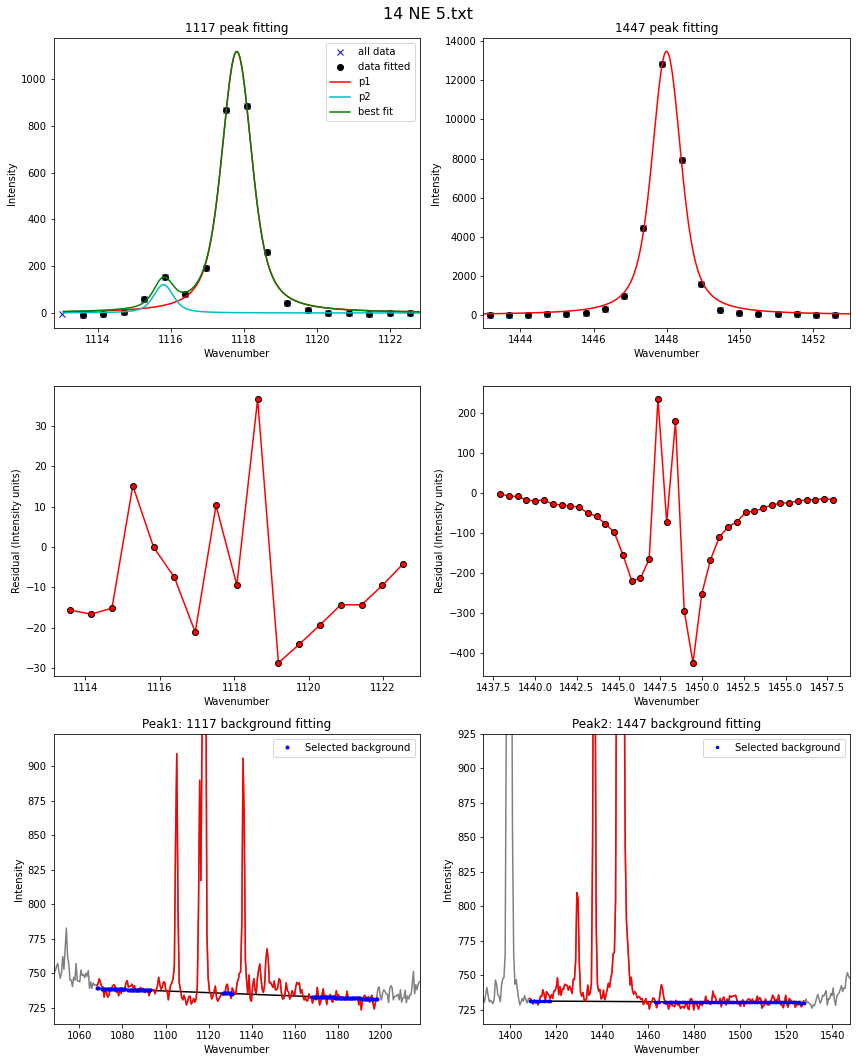

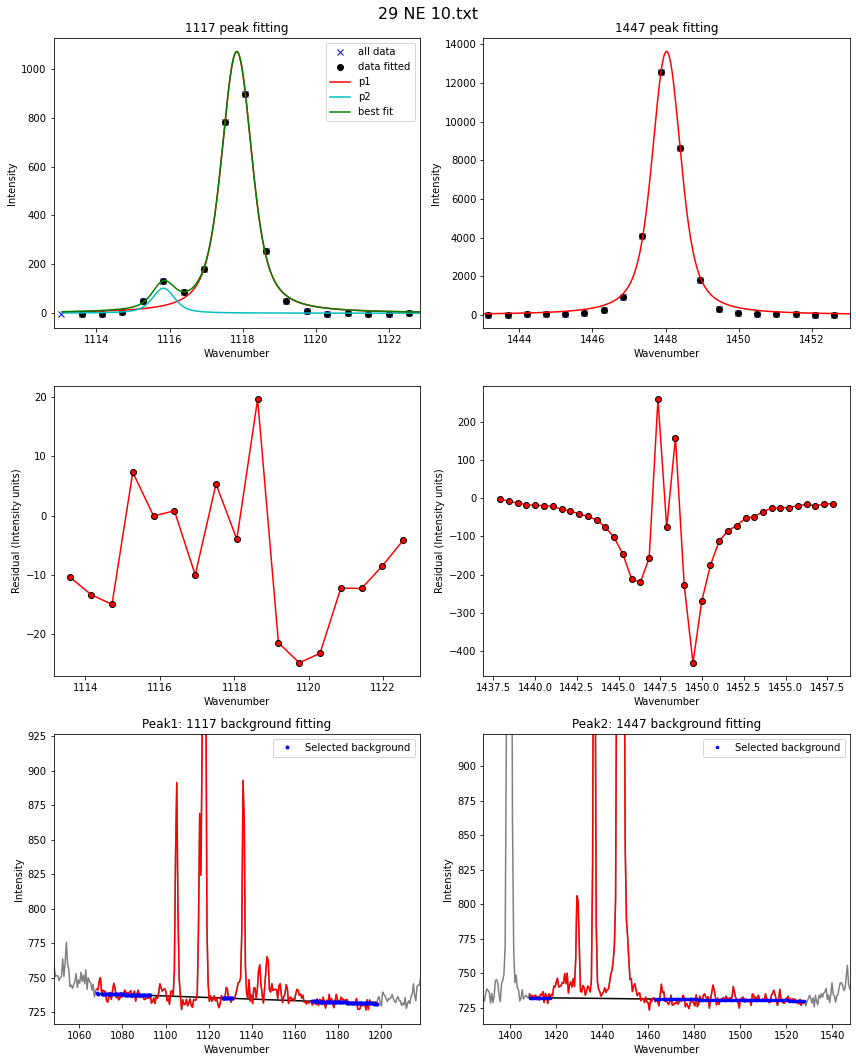

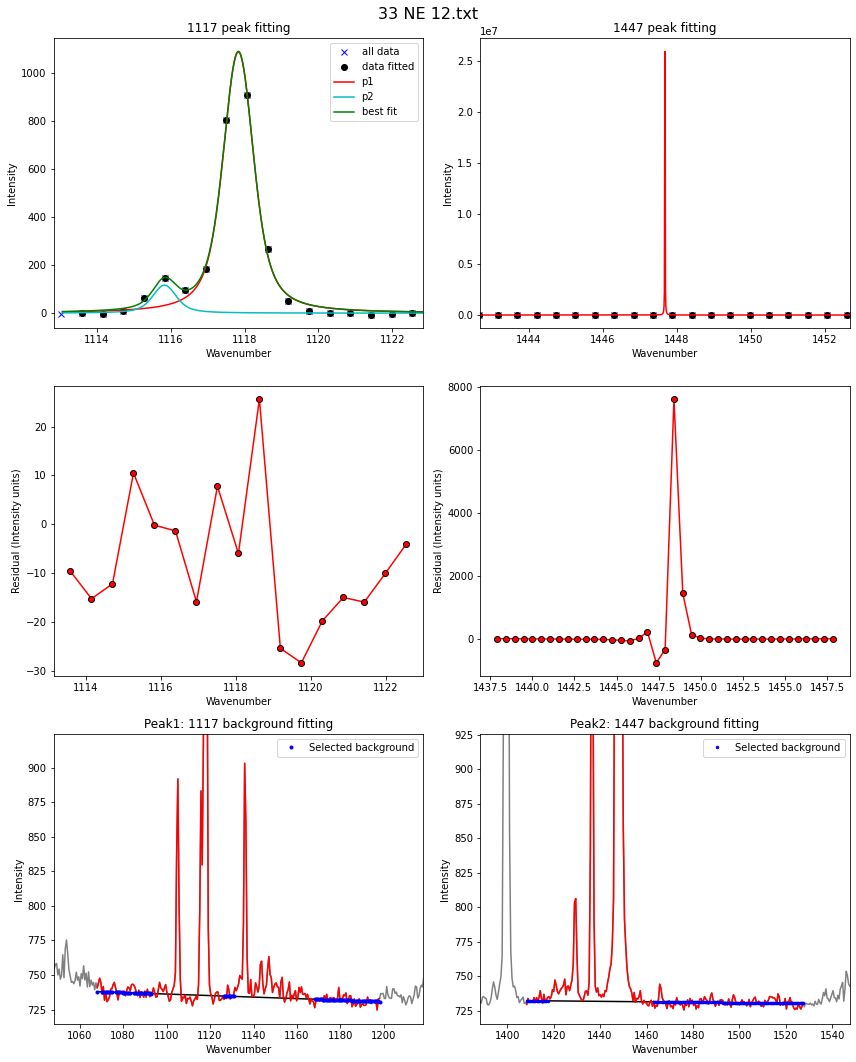

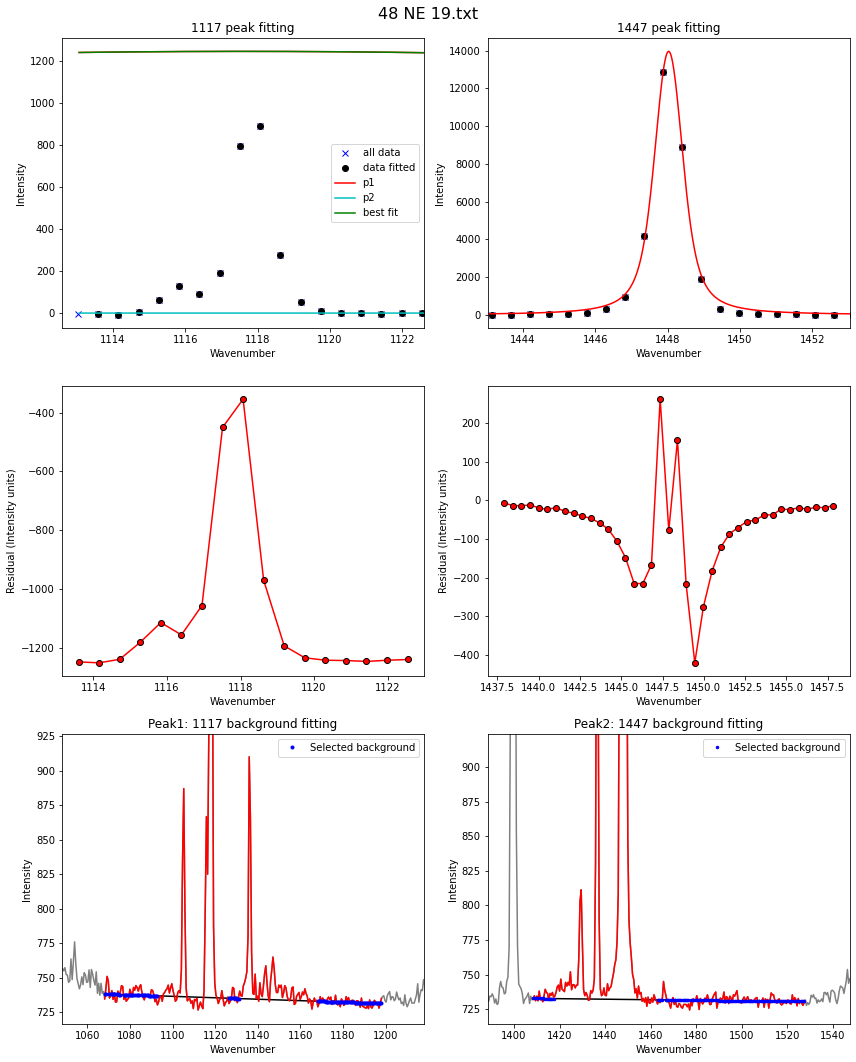

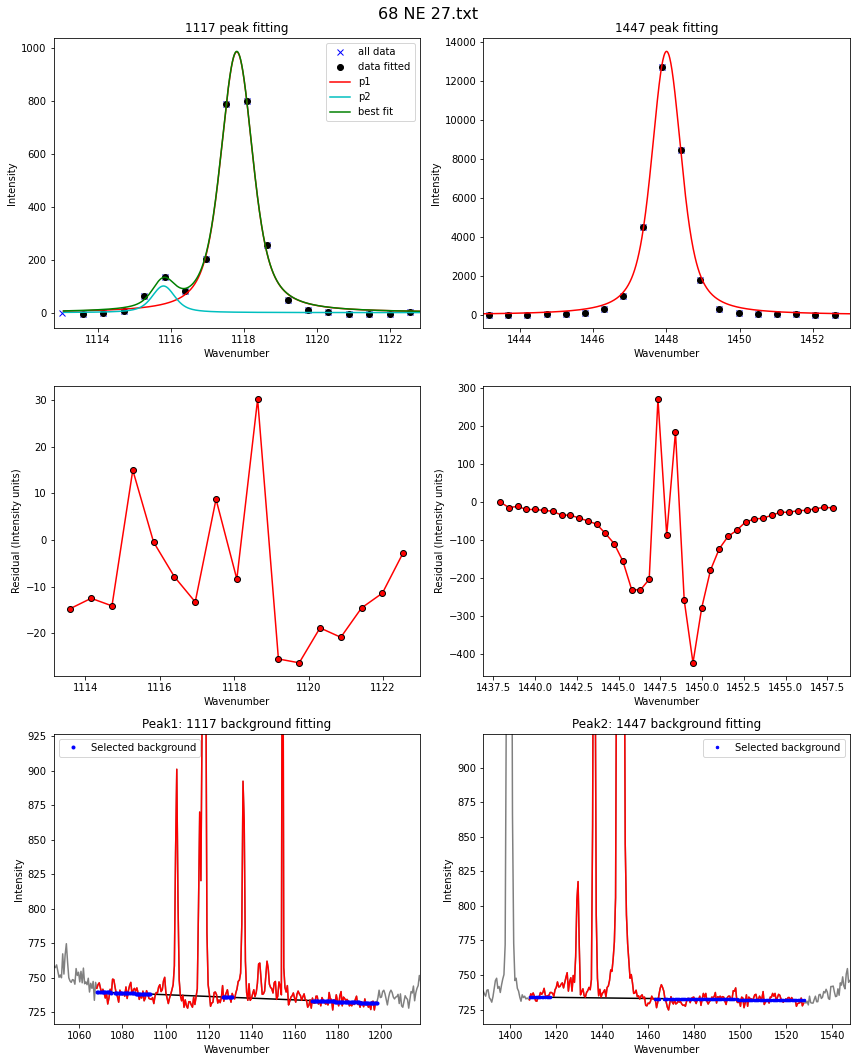

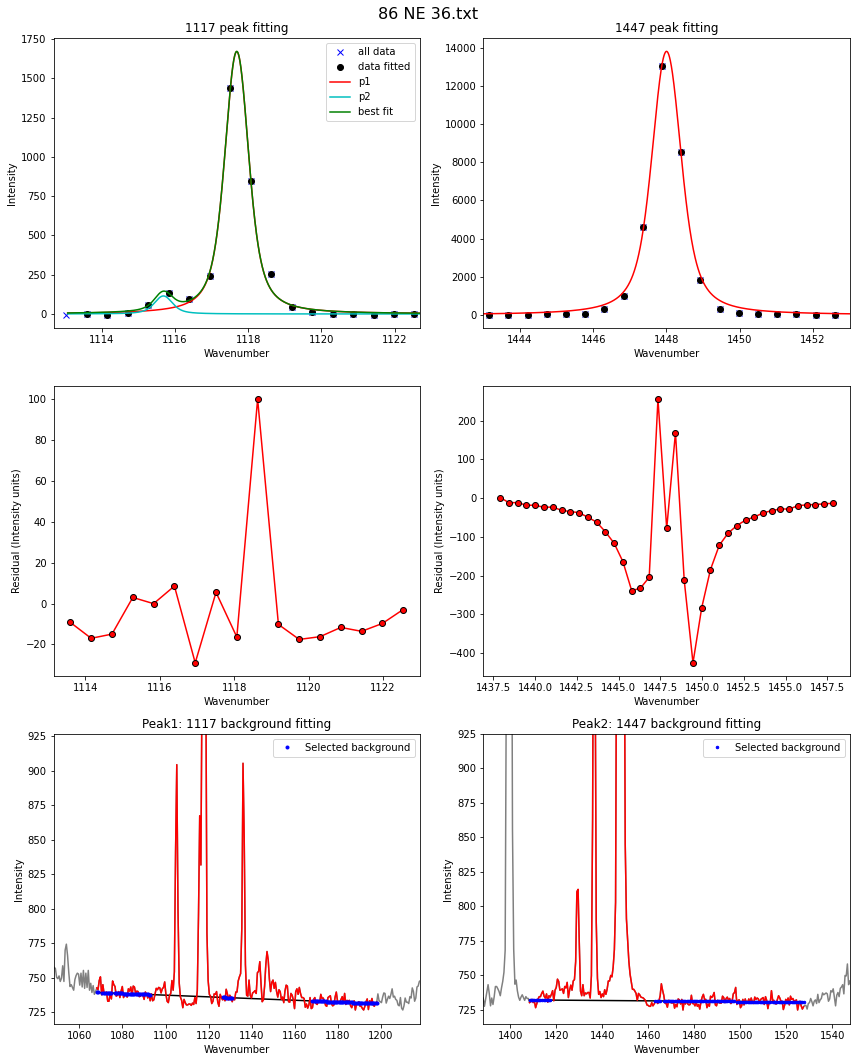

In [65]:
plot_figure=True # Means doesnt make figures, lot faster. 
save_excel=True # Saves to excel
save_clipboard=True # Copies to clipboard

df = pd.DataFrame([])
for i in range(0, len(Ne_files)):
    
    filename=Ne_files[i]
    Ne=pf.get_data(path=path, filename=filename, filetype=filetype)
    print('working on ' + str(Ne_files[i]))

    data=pf.fit_Ne_lines(Ne=Ne, filename=filename, path=path, prefix=prefix,
                         
                         
LH_offset_mini=LH_offset_mini, peaks_1=peaks_1, Ne_center_1=nearest_1117,
lower_bck_pk1=[-50, -25], upper_bck1_pk1=[8, 13], upper_bck2_pk1=[50, 80],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80],                         
Ne_center_2=nearest_1447, amplitude=amplitude, 
x_range_baseline=x_range_baseline, y_range_baseline=y_range_baseline, 
x_span_pk1_override=x_span_pk1_override,
x_span_pk2_override=x_span_pk2_override, x_range_peak=x_range_peak,                         
plot_figure=plot_figure, loop=True, DeltaNe_ideal=ideal_split['Ne_Split'])
    
    



    df = df.append(data)
    
df.to_excel('Ne_Lines_fit_loop.xlsx')
df.to_clipboard(excel=True)



## Look at residuals to work out if you need to fit some by hand

outliers


,File_Name,1447_peak_cent,error_1447,1117_peak_cent,error_1117,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_1447,residual_1117


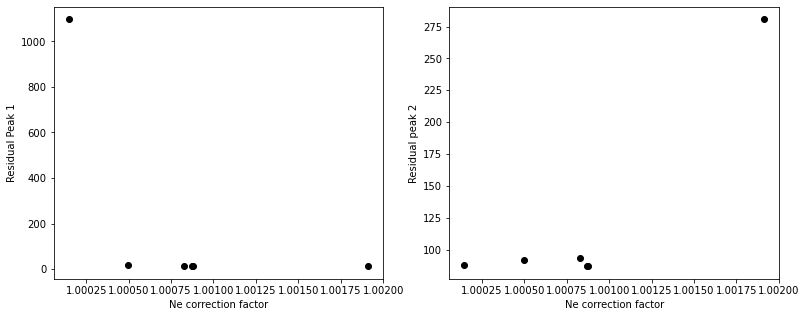

In [66]:
# Identify ones more than x sigma outside the mean of the splitting

Std_split=np.std(df['Ne_Corr'])
Mean_split=np.mean(df['Ne_Corr'])
# How many sigma outside mean splitting you want to consider
sigma=2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))
ax1.plot(df['Ne_Corr'], df['residual_1117'], 'ok', mfc='black')
ax2.plot(df['Ne_Corr'], df['residual_1447'], 'ok', mfc='black')
ax1.set_xlabel('Ne correction factor')
ax2.set_xlabel('Ne correction factor')
ax1.set_ylabel('Residual Peak 1')
ax2.set_ylabel('Residual peak 2')



outlier=df.loc[abs(Mean_split-df['Ne_Corr'])>Std_split*2]
ax1.plot(outlier['Ne_Corr'], outlier['residual_1117'], 'ok', mfc='red')
ax2.plot(outlier['Ne_Corr'], outlier['residual_1447'], 'ok', mfc='red')
print('outliers')
outlier


In [67]:
## Outliers - ones with max peak residual 

In [68]:
outlier['File_Name']

Series([], Name: File_Name, dtype: object)

## Manually fit ones you aren't happy with, and hand paste in
- For this one, it really didnt want a second peak

first iteration, peak Center=1117.6845
first iteration, peak Amplitude=1759.811
Trying to place second peak between 1111.68and1115.68
Error bars not determined by function


,File_Name,1447_peak_cent,error_1447,1117_peak_cent,error_1117,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_1447,residual_1117
0,33 NE 12.txt,1448.002043,0.00828,1117.688411,NaN,330.313631,1.000496,NaN,NaN,163.439791,16.783013


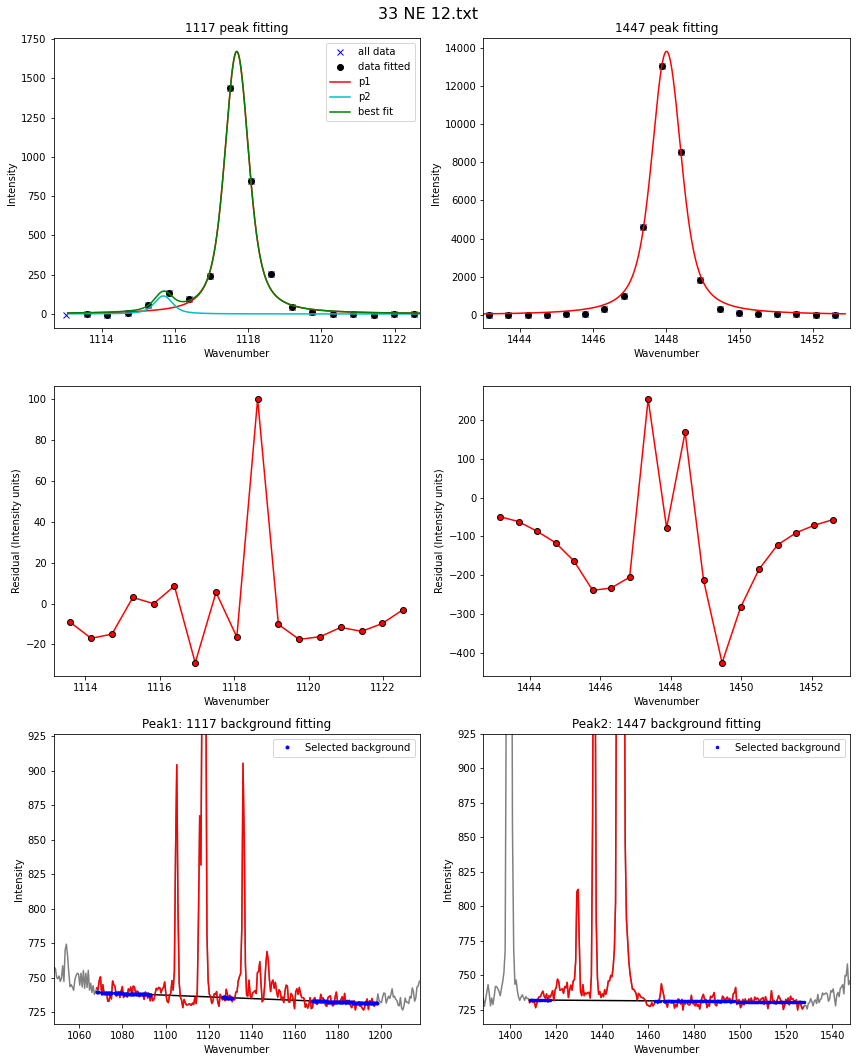

In [72]:
filename='33 NE 12.txt'
#If you have weak Ne lines and no secondary peak, set to 1
peaks_1=2
# Determines how far from the peak center the 2nd peak is. 
LH_offset_mini=[2, 6]
# If fit really bad, try tweaking the amplitude here
amplitude=100
#x_range - Determins how much outside your selected background position the baseline plot shows
x_range_baseline=20
# Y range- Determins how much y axis you get above the baseline on the plot
y_range_baseline=200

# Can either set this as none, in which case it fits between the background positions,
#or decide exactly how many wavenumbers either side of the peak position above you want the voigt routine to fit
# E.g. here, fitting 10 either side of the peak for Peak 1
x_span_pk1_override=[-5, 5]
# And -5 to the left, 7 to the right of Peak2
x_span_pk2_override=[-5, 5]

# Sets x lim for peak fit top plot, if None, uses range of x of fitting data, can override
x_range_peak=5


# To see other parameters you can tweak, do help(pf.fit_Ne_lines) if this isn't working fo your spectra. 
df_test, Ne_1117_reg_x_plot, Ne_1117_reg_y_plot=pf.fit_Ne_lines(
Ne=Ne, filename=filename, path=path, prefix=prefix,
LH_offset_mini=LH_offset_mini, peaks_1=peaks_1,
Ne_center_1=nearest_1117, Ne_center_2=nearest_1447,
lower_bck_pk1=[-50, -25], upper_bck1_pk1=[8, 13], upper_bck2_pk1=[50, 80],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80],
amplitude=amplitude, x_range_baseline=x_range_baseline, y_range_baseline=y_range_baseline, 
x_span_pk1_override=x_span_pk1_override,
x_span_pk2_override=x_span_pk2_override, x_range_peak=x_range_peak, DeltaNe_ideal=ideal_split['Ne_Split'])

df_test
